<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Exploratory Data Analysis - CAPSTONE PROJECT 
### Team 1007

## Table of Contents

1. [Introduction and Problem Statement](#section1)<br>
2. [Load the packages and data](#section2)<br>
3. [Data Pre-processing](#section3)<br>
4. [Exploratory Data Analysis](#eda)<br>
    - 4.1 [Plots for across States](#states)<br>
    - 4.2 [Plots for Maharashtra](#MH)<br>
5. [Summary of observations](#summary)<br>
6. [Conclusion](#conclusion)

<a id=section1></a> 
## 1. Introduction and Problem Statement

**Problem Statement**

<a id=section2></a> 
## 2. Load the packages and data 

In [2]:
# !pip install mysql.connector # Commented to avoid repeated installation

In [3]:
import sys                                                                      # Import packages
import pandas as pd
import numpy as np
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To adjust seaborn settings for the plots.
    
np.set_printoptions(precision=4)                    # To display values only upto four decimal places. 
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 100                 # To display every column of the dataset in head()

plt.style.use('seaborn-whitegrid')                  # To apply seaborn whitegrid style to the plots.
%matplotlib inline

import pandas_profiling                      # Get a quick overview for all the variables using pandas_profiling                                         

from pandas.plotting import parallel_coordinates



In [4]:
#Establize SQL connection to fetch data for Dept, Employee Details, Employee Master Data
def SqlConnection():
    return mysql.connector.connect(  host="cpanel.insaid.co",  user="student",  password="student",  database="Capstone2")

In [6]:
df_department = pd.read_sql('SELECT * FROM department_data', con=SqlConnection())

In [8]:
df_emp_det  = pd.read_sql('SELECT * FROM employee_details_data', con=SqlConnection())

In [9]:
df_emp_master = pd.read_sql('SELECT * FROM employee_data', con=SqlConnection())

In [10]:
df_emp_det.head()

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [11]:
df_department.head()

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray


In [13]:
df_emp_master.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [14]:
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [15]:
def analyze_df(df):
    print(df.shape)
    print("----------------------- Shape --------------------------------------------")
    print(df.info(null_counts=True))
    print("----------------------- Describe -----------------------------------------")
    print(df.describe())
    print("----------------------- Missing Data -------------------------------------")
    print(missing_data(df))
    return(df.head())

In [16]:
analyze_df(df_emp_det)

(14245, 4)
----------------------- Shape --------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14245 entries, 0 to 14244
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   employee_id     14245 non-null  int64 
 1   age             14245 non-null  int64 
 2   gender          14245 non-null  object
 3   marital_status  14245 non-null  object
dtypes: int64(2), object(2)
memory usage: 445.3+ KB
None
----------------------- Describe -----------------------------------------
         employee_id           age
count  14245.000000   14245.000000
mean   112123.050544  32.889926   
std    8500.457343    9.970834    
min    100101.000000  22.000000   
25%    105775.000000  24.000000   
50%    111298.000000  29.000000   
75%    116658.000000  41.000000   
max    148988.000000  57.000000   
----------------------- Missing Data -------------------------------------
                Tota

,employee_id,age,gender,marital_status
0,113558,43,Male,Married
1,112256,24,Female,Unmarried
2,112586,22,Female,Unmarried
3,108071,36,Male,Married
4,116915,38,Male,Married


In [17]:
analyze_df(df_emp_master)

(14150, 11)
----------------------- Shape --------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB
None
----------------------- Describe -----------------------------------------
       avg_monthly_hrs  filed_complain

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,None,NaN,0.866838,6,NaN,medium,0.134415,Left,4.0,124467
1,134.0,None,NaN,0.555718,2,NaN,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,NaN,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,NaN,0.961360,6,NaN,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,NaN,0.507349,2,NaN,medium,0.434845,Left,3.0,113707


In [18]:
df_emp_master.status.value_counts() # Pie chart

Employed    10784
Left        3366 
Name: status, dtype: int64

In [19]:
df_emp_master.last_evaluation.value_counts() # histogram

1.000000    358
0.940863    3  
0.896246    3  
0.505883    3  
0.645563    2  
           ..  
0.551225    1  
0.561198    1  
0.673404    1  
0.695355    1  
0.947309    1  
Name: last_evaluation, Length: 12188, dtype: int64

In [20]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1157
D00-PD     855 
D00-MT     815 
D00-FN     725 
NaN        707 
D00-MN     593 
-IT        207 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [21]:
#207 Departments are -IT which is not a valid Dept ID. Change to D00-IT
df_emp_master.department.replace("-IT", "D00-IT", inplace=True)

In [22]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD     855 
D00-MT     815 
D00-FN     725 
NaN        707 
D00-MN     593 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [23]:
df_new={'dept_id': 'D00-OTH'  , 'dept_name': 'Others', 'dept_head':'Other'}
df_department=df_department.append(df_new,ignore_index=True)

In [24]:
df_department

,dept_id,dept_name,dept_head
0,D00-IT,IT,Henry Adey
1,D00-SS,Sales,Edward J Bayley
2,D00-TP,Temp,Micheal Zachrey
3,D00-ENG,Engineering,Sushant Raghunathan K
4,D00-SP,Support,Amelia Westray
5,D00-FN,Finance,Aanchal J
6,D00-PR,Procurement,Louie Viles
7,D00-AD,Admin,Evelyn Tolson
8,D00-MN,Management,Ellie Trafton
9,D00-MT,Marketing,Reuben Swann


In [25]:
# Alternative way to add new department
# df_department.loc[len(df_department.index)] = ['D00-OTH', 'Others', 'Other']

In [26]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD     855 
D00-MT     815 
D00-FN     725 
NaN        707 
D00-MN     593 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [27]:
#707 Departments are null. These deparment should be classified as 'Unknown or Others' & 
#used for analysis, since there are employees of status as below:
#Employed    502
#Left        205

df_emp_master.department.fillna('D00-OTH', inplace=True)


In [28]:
df_emp_master.department.value_counts(dropna=False)

D00-SS     3905
D00-ENG    2575
D00-SP     2113
D00-IT     1364
D00-PD     855 
D00-MT     815 
D00-FN     725 
D00-OTH    707 
D00-MN     593 
D00-AD     175 
D00-PR     173 
D00-TP     150 
Name: department, dtype: int64

In [29]:
# Checking nulls in tenure

df_emp_master.tenure.value_counts(dropna=False)

3.0     6018
2.0     3023
4.0     2394
5.0     1369
6.0     660 
10.0    201 
7.0     180 
8.0     155 
NaN     150 
Name: tenure, dtype: int64

In [30]:
# There are 150 Null records for tenure
# Replace null with median
df_emp_master['tenure'] = df_emp_master['tenure'].replace({np.nan: getattr(df_emp_master['tenure'], 'median')(),})

In [31]:
df_emp_master.tenure.value_counts(dropna=False)

3.0     6168
2.0     3023
4.0     2394
5.0     1369
6.0     660 
10.0    201 
7.0     180 
8.0     155 
Name: tenure, dtype: int64

In [32]:
df_emp_master.tenure.unique()

array([ 4.,  3.,  5.,  6.,  2., 10.,  7.,  8.])

In [33]:
df_emp_master.satisfaction.value_counts(dropna=False)

1.000000    357
NaN         150
0.481001    3  
0.783548    2  
0.844769    2  
           ..  
0.796433    1  
0.687016    1  
0.609661    1  
0.981732    1  
0.831547    1  
Name: satisfaction, Length: 13498, dtype: int64

<AxesSubplot:ylabel='Frequency'>

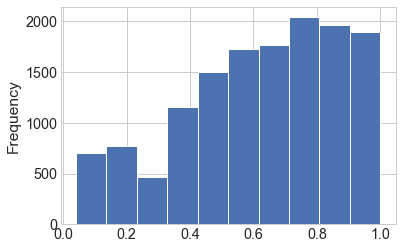

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

df_emp_master.satisfaction.plot(kind='hist')


In [47]:
# There are 150 reocrds with NULL values for Satisfaction column
# impute with mean

df_emp_master['satisfaction'] = df_emp_master['satisfaction'].replace({np.nan: getattr(df_emp_master['satisfaction'], 'mean')(),})

In [49]:
df_emp_master.satisfaction.value_counts(dropna=False)

1.000000    357
0.621212    150
0.481001    3  
0.832118    2  
0.904372    2  
           ..  
0.687016    1  
0.609661    1  
0.981732    1  
0.620342    1  
0.831547    1  
Name: satisfaction, Length: 13498, dtype: int64

In [53]:
print(df_emp_master.filed_complaint.value_counts(dropna=False))
print(df_emp_master.recently_promoted.value_counts(dropna=False))

NaN    12104
1.0    2046 
Name: filed_complaint, dtype: int64
NaN    13853
1.0    297  
Name: recently_promoted, dtype: int64


In [54]:
# Replacing null with 0
df_emp_master.filed_complaint.fillna(0, inplace=True)
df_emp_master.recently_promoted.fillna(0, inplace=True)

In [55]:
print(df_emp_master.filed_complaint.value_counts(dropna=False))
print(df_emp_master.recently_promoted.value_counts(dropna=False))

0.0    12104
1.0    2046 
Name: filed_complaint, dtype: int64
0.0    13853
1.0    297  
Name: recently_promoted, dtype: int64


In [58]:
df_emp_master[df_emp_master.employee_id == 0]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.0,D00-SS,0.0,0.852702,6,0.0,low,0.069168,Left,4.0,0
304,264.0,D00-ENG,0.0,0.774554,6,0.0,low,0.110974,Left,4.0,0
1234,129.0,D00-SP,0.0,0.402660,2,0.0,medium,0.437359,Left,3.0,0
11304,167.0,D00-OTH,0.0,0.880053,5,0.0,low,0.682140,Employed,3.0,0
12304,259.0,D00-ENG,0.0,0.505883,5,0.0,low,0.631046,Employed,4.0,0


In [60]:
df_emp_master.shape

(14150, 11)

In [61]:
df_emp_master.loc[(df_emp_master['employee_id']!=0) & (df_emp_master['department']!=None)]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.0,D00-OTH,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467
1,134.0,D00-OTH,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707
...,...,...,...,...,...,...,...,...,...,...,...
14145,245.0,D00-SS,0.0,0.850785,6,0.0,medium,0.225084,Employed,5.0,101809
14146,192.0,D00-SS,0.0,0.951901,3,0.0,medium,0.539834,Employed,3.0,116153
14147,175.0,D00-MN,0.0,0.854538,4,0.0,medium,0.934465,Employed,3.0,119780
14148,268.0,D00-MT,0.0,0.900887,5,0.0,medium,0.906613,Left,5.0,115325


In [63]:
df_emp_master.loc[(df_emp_master['employee_id']==0) ]

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284.0,D00-SS,0.0,0.852702,6,0.0,low,0.069168,Left,4.0,0
304,264.0,D00-ENG,0.0,0.774554,6,0.0,low,0.110974,Left,4.0,0
1234,129.0,D00-SP,0.0,0.402660,2,0.0,medium,0.437359,Left,3.0,0
11304,167.0,D00-OTH,0.0,0.880053,5,0.0,low,0.682140,Employed,3.0,0
12304,259.0,D00-ENG,0.0,0.505883,5,0.0,low,0.631046,Employed,4.0,0


In [64]:
# Missing values
df_emp_master.last_evaluation.fillna(0, inplace=True)

## Denormalize the Data - Merging Datasets

In [66]:
# Columns in department table and employee details dataset has different names for department id
# So column name should be renamed to join the tables

df_department=df_department.rename(columns={'dept_id':'department'})
df_department.columns

Index(['department', 'dept_name', 'dept_head'], dtype='object')

In [68]:
df_final = df_emp_master.merge(df_emp_det,on='employee_id', how='left')

In [69]:
df_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246.0,D00-OTH,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42.0,Female,Married
1,134.0,D00-OTH,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,51.0,Female,Married
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried


In [73]:
df_final[df_final.duplicated() == False].shape

(14121, 14)

In [74]:
df_final =  df_final.merge(df_department, on='department', how='left')

In [75]:
df_final.shape

(14150, 16)

In [76]:
# Removed data with employeeid = 0
df_final.drop(df_final[df_final['employee_id'] == 0].index, inplace=True)

In [77]:
df_final.shape

(14145, 16)

In [78]:
df_final[df_final.duplicated() == True].shape

(29, 16)

In [96]:
df_final.drop_duplicates(inplace = True)

In [97]:
df_final['last_evaluation_missing']= df_final.last_evaluation.isnull().astype(int)

In [98]:
df_final.shape

(14116, 17)

In [99]:
analyze_df(df_final)

(14116, 17)
----------------------- Shape --------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 0 to 14120
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avg_monthly_hrs          14116 non-null  float64
 1   department               14116 non-null  object 
 2   filed_complaint          14116 non-null  float64
 3   last_evaluation          14116 non-null  float64
 4   n_projects               14116 non-null  int64  
 5   recently_promoted        14116 non-null  float64
 6   salary                   14116 non-null  object 
 7   satisfaction             14116 non-null  float64
 8   status                   14116 non-null  object 
 9   tenure                   14116 non-null  float64
 10  employee_id              14116 non-null  int64  
 11  age                      14116 non-null  float64
 12  gender                   14116 non-null  ob

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head,last_evaluation_missing
0,246.0,D00-OTH,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42.0,Female,Married,Others,Other,0
1,134.0,D00-OTH,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,Others,Other,0
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried,Sales,Edward J Bayley,0
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,51.0,Female,Married,Support,Amelia Westray,0
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried,Sales,Edward J Bayley,0


In [100]:
df_final.employee_id.nunique()

14116

In [101]:
df_final.employee_id.shape

(14116,)

## EDA

In [228]:
# Plot help functions
def ShowHBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width}', (x + width*1.02, y + height/2), va='center')

def ShowHBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_width())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{width/total:.0%}', (x + width*1.02, y + height/2), va='center')
        
def ShowVBarValue():
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')

def ShowVBarPer():
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height/total:.0%}', (x + width/2, (y + height*1.02) ), ha='center')
        
def SetPlotText(title, xlabel='', ylabel='', fontSize=20, text_direction=0, formatBarValue=True):
    
    if (formatBarValue) :
        padding = text_direction == 90 and 30 or 10
        position_index = text_direction == 90 and 2 or 3
        for p in ax.patches:
            ax.annotate(str(p.get_height()), (p.get_x() + (p.get_width()/position_index), p.get_height()+padding), rotation=text_direction)
    plt.xlabel(xlabel, fontsize=fontSize)
    plt.ylabel(ylabel, fontsize=fontSize)
    plt.title(title,fontsize=fontSize+5)

### Q1. Number of emplyed and left count in dataset?

In [102]:
df_final.status.value_counts()

Employed    10761
Left        3355 
Name: status, dtype: int64

In [150]:
# plt.title('Employed Vs Left', fontsize=14);
# print(df_final.groupby('status').status.count().plot.pie(autopct='%1.1f%%'))

In [148]:
colors = sns.color_palette('pastel')[0:20]

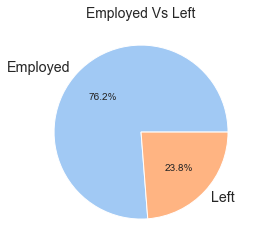

In [149]:
plt.title('Employed Vs Left', fontsize=14);
plt.pie(df_final.groupby('status').status.count(), labels=['Employed', 'Left'], colors = colors, autopct='%.1f%%')
plt.show()

## Q2. Employees count at different tenures? Employed and Left employee count at different tenures?

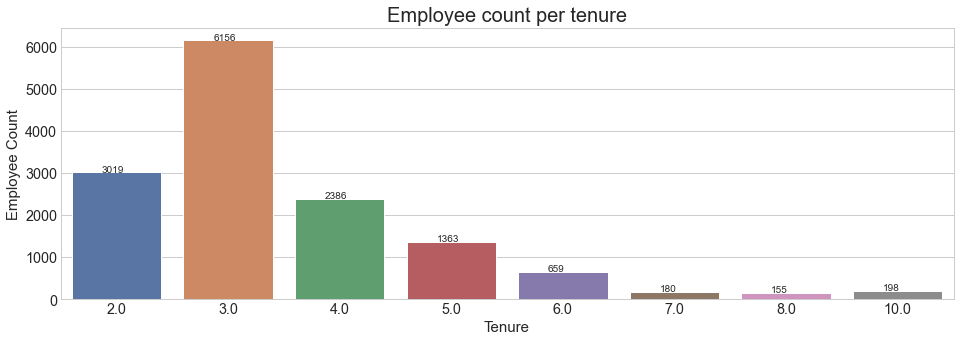

In [181]:
fig, ax = plt.subplots(figsize=(16,5))
sns.countplot(data=df_final, x='tenure')
SetPlotText("Employee count per tenure", "Tenure", "Employee Count", 15)

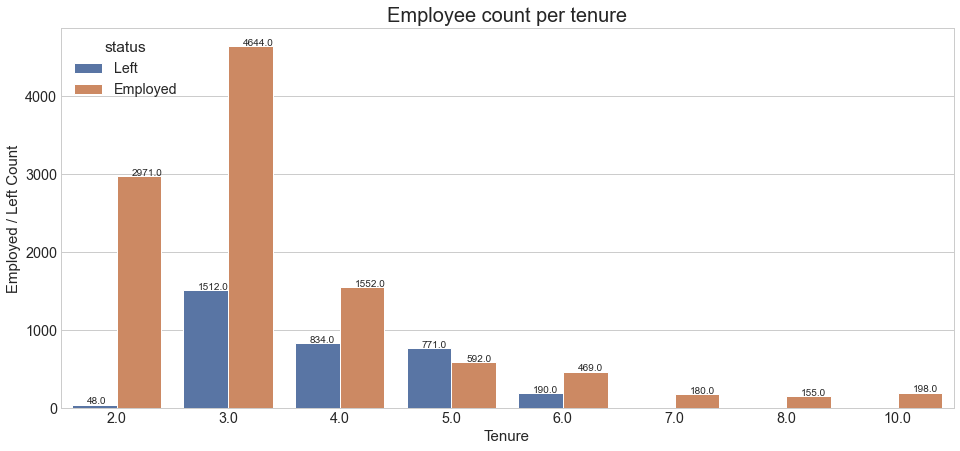

In [182]:
fig, ax = plt.subplots(figsize=(16,7))
sns.countplot(data=df_final, x='tenure', hue='status')
SetPlotText("Employee count per tenure", "Tenure", "Employed / Left Count", 15)

## Q3. What is department wise Employee count? 

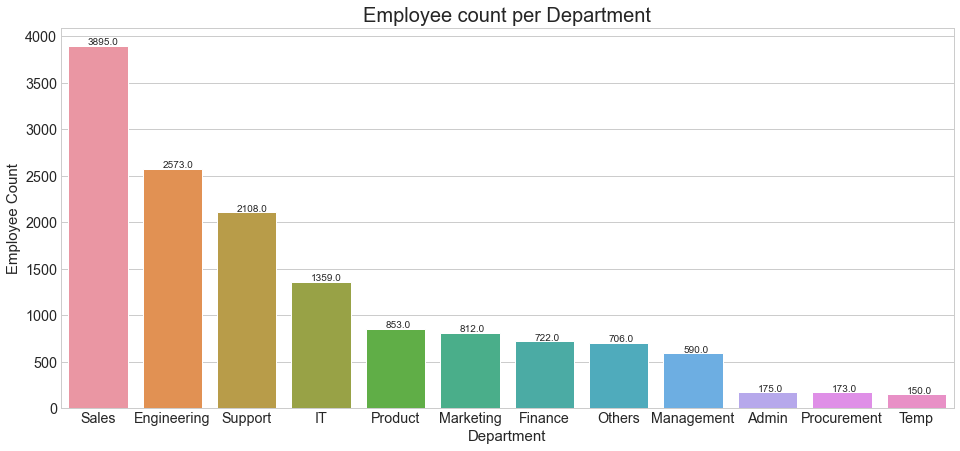

In [222]:
plotData = pd.DataFrame((df_final.groupby(['dept_name','employee_id']).employee_id.count()).groupby('dept_name').count().nlargest(20))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(data=plotData,x='dept_name', y='employee_count')
SetPlotText("Employee count per Department", "Department", "Employee Count", 15)

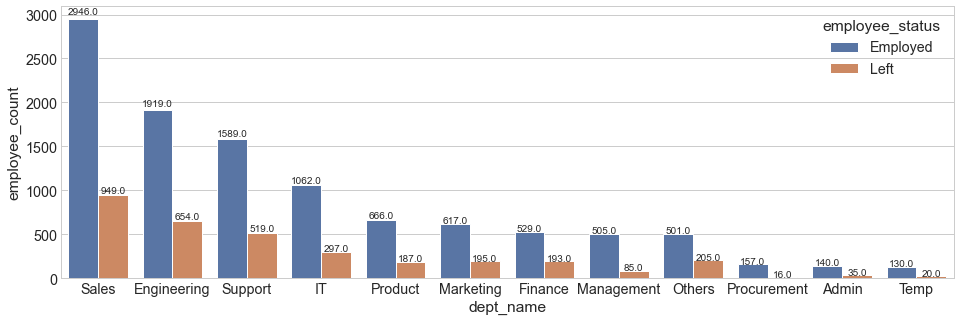

In [239]:
plotData = pd.DataFrame((df_final.groupby(['dept_name','employee_id', 'status']).employee_id.count()).groupby(['dept_name','status']).count().nlargest(30))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=plotData,x='dept_name', y='employee_count', hue="employee_status")
#SetPlotText("Employee count per Department", "Department", "Employee Count", 15, False)
ShowVBarValue()

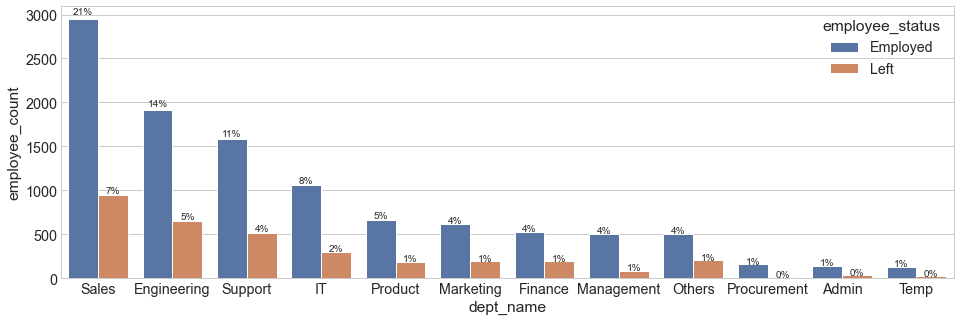

In [240]:
plotData = pd.DataFrame((df_final.groupby(['dept_name','employee_id', 'status']).employee_id.count()).groupby(['dept_name','status']).count().nlargest(30))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=plotData,x='dept_name', y='employee_count', hue="employee_status")
#SetPlotText("Employee count per Department", "Department", "Employee Count", 15, False)
ShowVBarPer()

## Q4. What is gender wise Employee count & attrition analysis? 

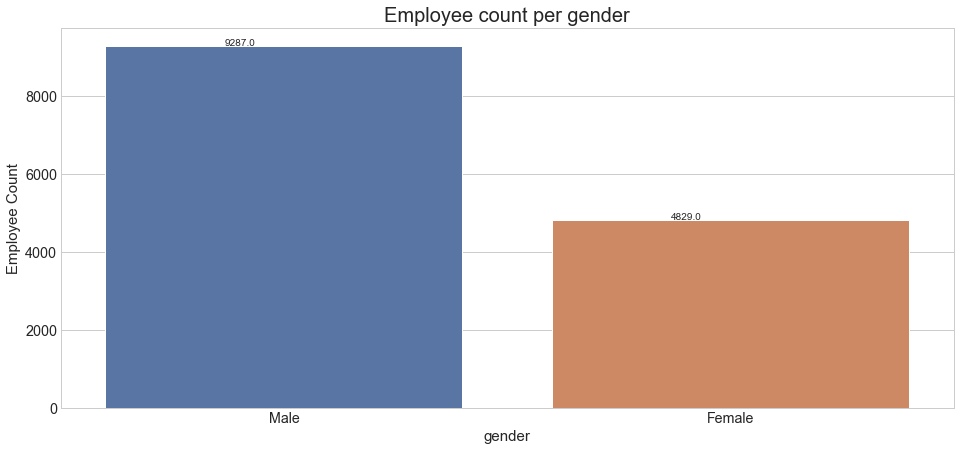

In [242]:
plotData = pd.DataFrame((df_final.groupby(['gender','employee_id']).employee_id.count()).groupby('gender').count().nlargest(20))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(data=plotData,x='gender', y='employee_count')
SetPlotText("Employee count per gender", "gender", "Employee Count", 15)

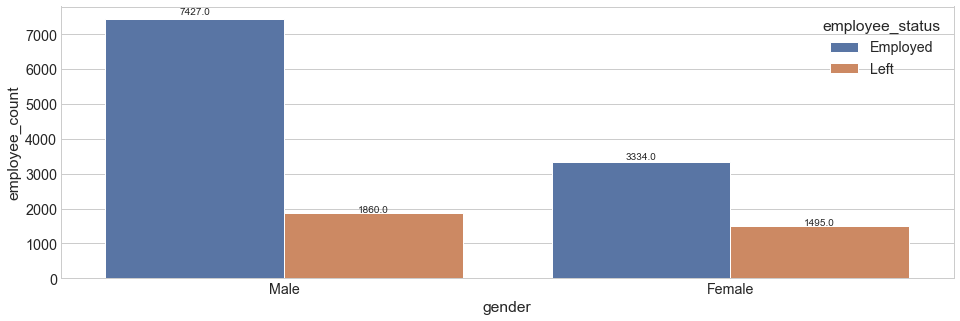

In [243]:
plotData = pd.DataFrame((df_final.groupby(['gender','employee_id', 'status']).employee_id.count()).groupby(['gender','status']).count().nlargest(30))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=plotData,x='gender', y='employee_count', hue="employee_status")
ShowVBarValue()

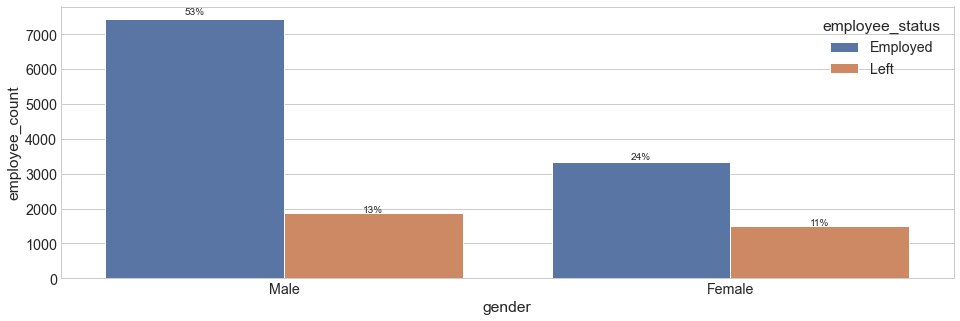

In [244]:
plotData = pd.DataFrame((df_final.groupby(['gender','employee_id', 'status']).employee_id.count()).groupby(['gender','status']).count().nlargest(30))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=plotData,x='gender', y='employee_count', hue="employee_status")
ShowVBarPer()

## Q5. Gender & Department wise Employee count & attrition analysis? 

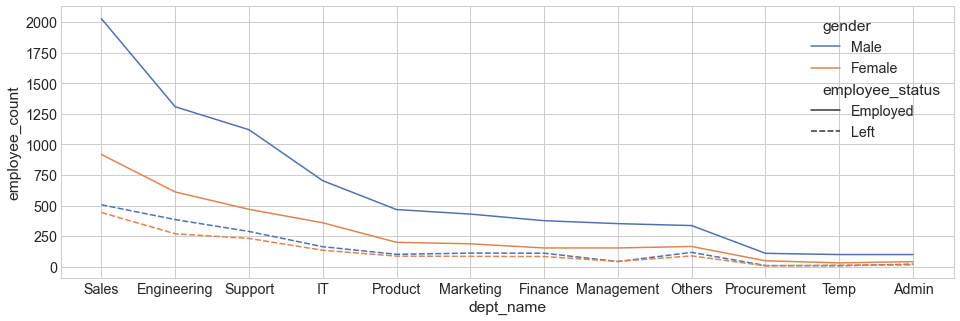

In [260]:
plotData = pd.DataFrame((df_final.groupby(['dept_name','gender', 'employee_id', 'status']).employee_id.count()).groupby(['dept_name','gender', 'status']).count().nlargest(50))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=plotData, x='dept_name', y='employee_count', hue='gender', style='employee_status')
#SetPlotText("Employee count per Department", "Department", "Employee Count", 15, False)
ShowVBarPer()

## Q6. Age wise Employee count & attrition analysis? 

In [283]:
# Adding age groups
# 20-25, 25-30, 31-35 etc..

def classify_age(r):
    if r.age >= 20 and r.age <= 25:
        return '20-25'
    elif r.age >= 26 and r.age <= 30:
        return '26-30'
    elif r.age >= 31 and r.age <= 35:
        return '31-35'
    elif r.age >= 36 and r.age <= 40:
        return '36-40'
    elif r.age >= 41 and r.age <= 45:
        return '41-45'
    elif r.age >= 46 and r.age <= 50:
        return '46-50'
    elif r.age >= 51 and r.age <= 55:
        return '51-55'
    elif r.age >= 56 and r.age <= 60:
        return '56-60'
    elif r.age >= 61 and r.age <= 65:
        return '61-65'
    else:        
        return '0-100'
    

df_final["age_group"] = df_final.apply(classify_age, axis=1)

In [286]:
df_final.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name,dept_head,last_evaluation_missing,age_group
0,246.0,D00-OTH,0.0,0.866838,6,0.0,medium,0.134415,Left,4.0,124467,42.0,Female,Married,Others,Other,0,41-45
1,134.0,D00-OTH,0.0,0.555718,2,0.0,low,0.511041,Left,3.0,112210,23.0,Female,Unmarried,Others,Other,0,20-25
2,156.0,D00-SS,1.0,0.474082,2,0.0,medium,0.405101,Left,3.0,126150,24.0,Female,Unmarried,Sales,Edward J Bayley,0,20-25
3,256.0,D00-SP,0.0,0.961360,6,0.0,low,0.152974,Left,4.0,125346,51.0,Female,Married,Support,Amelia Westray,0,51-55
4,146.0,D00-SS,0.0,0.507349,2,0.0,medium,0.434845,Left,3.0,113707,23.0,Female,Unmarried,Sales,Edward J Bayley,0,20-25


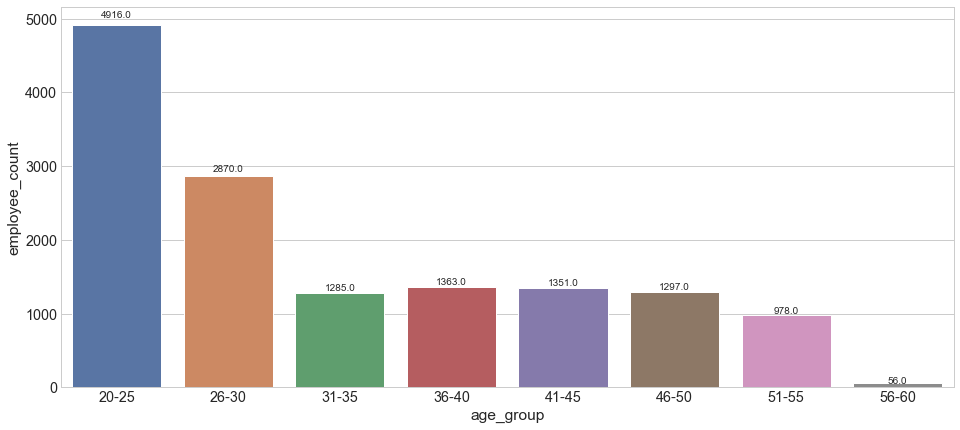

In [285]:
plotData = pd.DataFrame((df_final.groupby(['age_group','employee_id']).employee_id.count()).groupby('age_group').count())
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,7))
sns.barplot(data=plotData,x='age_group', y='employee_count')
ShowVBarValue()

## Q7. Gender & Age wise Employee count & attrition analysis? 

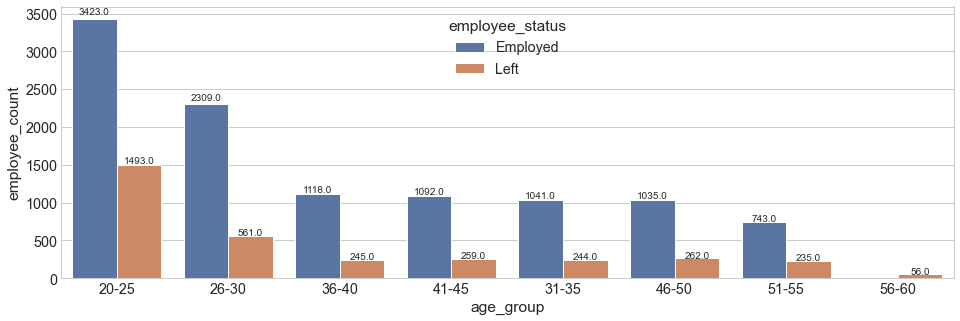

In [288]:
plotData = pd.DataFrame((df_final.groupby(['age_group','employee_id', 'status']).employee_id.count()).groupby(['age_group','status']).count().nlargest(40))
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.barplot(data=plotData,x='age_group', y='employee_count', hue="employee_status")
ShowVBarValue()

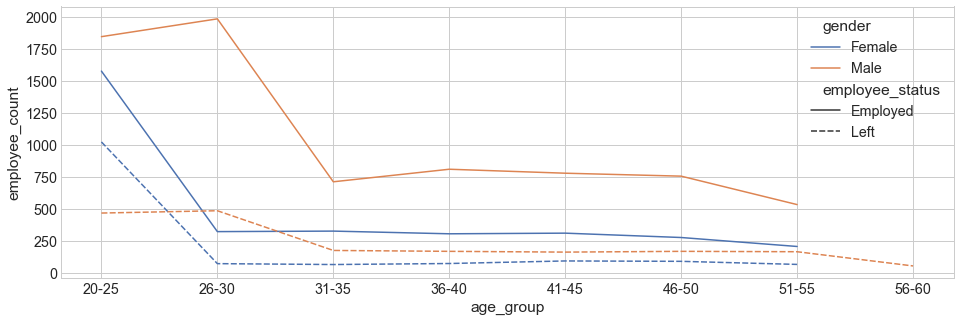

In [306]:
plotData = pd.DataFrame((df_final.groupby(['age_group','employee_id', 'gender', 'status']).employee_id.count()).groupby(['age_group', 'gender', 'status']).count())
plotData.reset_index(inplace=True)
plotData.rename(columns={'employee_id':'employee_count', 'status':'employee_status'}, inplace=True)
fig, ax = plt.subplots(figsize=(16,5))
sns.lineplot(data=plotData,x='age_group', y='employee_count', hue="gender", style='employee_status')
ShowVBarValue()

In [290]:
df_final[df_final.age_group == '56-60'].status.unique()

array(['Left'], dtype=object)

In [297]:
df_final[df_final.age >= 55].status.value_counts()

Left    94
Name: status, dtype: int64

### Insights

* Attrition is more at age from 20-30
* if the age is more than 54 yrs.. employees only left or no employees joined
* Female employees are having more percentage of attrition
* Female employees attrition rate is very high at age 20-25
* Female employees attrition rate is almost stable if the age is more than 25
* Male employees attrition is high at the age 20-25 but variance is very minimal.